# Part I - Loan Data from Prosper Dataset Exploration

## by Ubogun O. Divine-Favour

## Table of Content

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li> 
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id="intro"><\a>

## Introduction 
 
Loan Data from Prosper is a dataset with over 110,000 loan entries on 81 variables. In this document though, it is modified to have only 14,882 loan entries on 13 variables. The selected variables are TermMonths (originally "Term", but renamed "TermMonths"), LoanStatus, BorrowerAPR, BorrowerRate, ListingCategory, BorrowerState, Occupation, EmploymentStatus, IsBorrowerHomeowner, IncomeRange, and LoanOriginalAmount. Two other variables, JobStatus and Term, will also be created during the analysis of the dataset, making up the 13 variables of the modified dataset in this document.<br>

- TermMonths is the length of the loan in months 
- Term states the term each month length represents (short term, mid term, and long term)
- LoanStatus means the status of the loan which could be completed, current, charged off, defaulted, cancelled, final payment in progress, or past due. Past due usually includes the range in which the number of days for which the loan is past due falls into in parentheses. 
> During the analysis, the rows with "Current" values will be removed from our dataset as they will not be needed. 
- ListingCategory contains the listing category that the borrower selected when posting their listing for the loan. 
- BorrowerAPR is the borrower's Annual Percentage Rate, which is the totality of all the cost of a loan to a borrower (including the interest rate) in a year expressed in percentage. 
- BorrowerRate is the interest rate a borrower gets for a loan.
- IsHomeonwer contains a boolean value (True/False) for whether the borrower owns a home. 
- Occupation, EmploymentStatus, and IncomeRange contain the occupation, employment status and income range of the borrower respectively. 
- BorrowerState is the state of residence of borrower
- LoanOriginalAmount is the original amount loaned to the borrower.
- JobStatus states if the borrower is working or not.

<a id="wrangling"><\a>    

## Preliminary Wrangling

In this section, the dataset is assessed and issues found are cleaned. The cleaning process would involve the removal of variables not necessary for this analysis. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load dataset into a dataframe
prosper_loans = pd.read_csv("prosperLoanData.csv")


In [3]:
def drop_unwanted_cols(df, list_of_cols_to_keep): 
    """This function selects out unwanted columns in a dataframe 
    and drops them"""
    new_list = []
    for col in df.columns: 
        if col not in list_of_cols_to_keep: 
            new_list.append(col)
    return df.drop(new_list, axis = 1) 
    

In [4]:
#create a list of wanted columns
wanted_cols = ["Term","LoanOriginalAmount", "LoanStatus", "BorrowerAPR", "BorrowerRate", "ListingCategory (numeric)", "BorrowerState", "Occupation", "EmploymentStatus", "IsBorrowerHomeowner", "IncomeRange"]

#apply the drop_unwanted_cols function to the dataframe  
prosper_loans = drop_unwanted_cols(prosper_loans, wanted_cols)


#### Assess data

In [5]:
#view random rows of dataframe 
prosper_loans.sample(15)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount
9446,60,Current,0.28930,0.2632,1,OH,Civil Service,Employed,True,"$50,000-74,999",15000
17662,36,Current,0.14816,0.1199,1,MA,Other,Self-employed,False,"$50,000-74,999",15000
96453,36,Current,0.08577,0.0724,1,WV,Other,Other,False,"$1-24,999",4000
58947,36,Current,0.14446,0.1159,1,SC,Professional,Employed,True,"$75,000-99,999",15000
84612,36,Current,0.14751,0.1189,1,NC,Food Service Management,Employed,True,"$50,000-74,999",10000
13212,36,Current,0.32576,0.2899,1,KY,Skilled Labor,Employed,True,"$50,000-74,999",5000
99744,36,Current,0.12691,0.0990,1,IL,Psychologist,Employed,False,"$25,000-49,999",2500
90262,36,Completed,0.17722,0.1700,0,NaN,Laborer,Not available,True,Not displayed,3000
76980,36,Current,0.25279,0.2150,1,VA,Teacher,Employed,False,"$25,000-49,999",5000
73934,36,Completed,0.21699,0.1800,13,KY,Other,Employed,True,"$50,000-74,999",3500


In [6]:
#check number of rows and columns of dataframe 
prosper_loans.shape


(113937, 11)

In [7]:
#check summarized info of dataset 
prosper_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerAPR                113912 non-null  float64
 3   BorrowerRate               113937 non-null  float64
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   BorrowerState              108422 non-null  object 
 6   Occupation                 110349 non-null  object 
 7   EmploymentStatus           111682 non-null  object 
 8   IsBorrowerHomeowner        113937 non-null  bool   
 9   IncomeRange                113937 non-null  object 
 10  LoanOriginalAmount         113937 non-null  int64  
dtypes: bool(1), float64(2), int64(3), object(5)
memory usage: 8.8+ MB


#### Note 

The listing category is present in the dataset in numeric form as __ListingCategory (numeric)__ variable. Each number has a word meaning and would be converted to the meaning in word during cleaning.

In [8]:
#check for duplicated rows
prosper_loans.duplicated().sum()

1742

In [9]:
#check for the unique values in Term column 
prosper_loans.Term.unique()


array([36, 60, 12])

In [10]:
#check for the unique values in the LoanStatus column
prosper_loans.LoanStatus.unique()


array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [11]:
#check values count for loan status variable 
prosper_loans.LoanStatus.value_counts()


Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [12]:
#check for the unique values in the EmploymentStatus column
prosper_loans.EmploymentStatus.unique()


array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [13]:
#check for number of null values in each column
prosper_loans.isnull().sum() 


Term                            0
LoanStatus                      0
BorrowerAPR                    25
BorrowerRate                    0
ListingCategory (numeric)       0
BorrowerState                5515
Occupation                   3588
EmploymentStatus             2255
IsBorrowerHomeowner             0
IncomeRange                     0
LoanOriginalAmount              0
dtype: int64

In [14]:
#check for the unique values in the IncomeRange column
prosper_loans.IncomeRange.unique()


array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [15]:
#check employment status of people with $0 income range values
prosper_loans[prosper_loans["IncomeRange"] == "$0"]["EmploymentStatus"].unique()


array(['Full-time', 'Self-employed', 'Retired', 'Employed', 'Part-time',
       'Not employed'], dtype=object)

In [16]:
#obtain unique values for ListingCategory 
prosper_loans["ListingCategory (numeric)"].unique()

array([ 0,  2, 16,  1,  7, 13,  6, 15, 20, 19,  3, 18,  8,  4, 11, 14,  5,
        9, 17, 10, 12])

In [17]:
#obtain value counts of each unique value in ListingCategory (numeric) columm 
prosper_loans["ListingCategory (numeric)"].value_counts().sort_values()


17       52
12       59
9        85
10       91
8       199
11      217
16      304
5       756
19      768
20      771
14      876
18      885
15     1522
13     1996
4      2395
6      2572
3      7189
2      7433
7     10494
0     16965
1     58308
Name: ListingCategory (numeric), dtype: int64

#### Issues Noticed <br>

- Too many variations of "Past Due" values in __LoanStatus__ column 
- Listing category in numbers 
- __ListingCategory (numeric)__ column name
- "Not Available" values in __EmploymentStatus__ column 
- __IncomeRange__ values of "Not Displayed"
- "Not employed" __IncomeRange__ values 
- Rows with \\$0 income range for borrowers with a job (that is borrowers with full-time or part-time or employed or self-employed employment status)  
- Rows with "Current" loan status (__LoanStatus__) 
- Rows with "Other" value in __EmploymentStatus__ column
- Job status column needed 
- __Term__ column name
- A column depicting term in words needed
- __TermMonths__, __Term__ and __IncomeRange__ datatypes
- Null rows


#### Clean data

In [18]:
#make copy of dataset to clean 
loans_clean = prosper_loans.copy()

First, the duplicate rows noticed in the assessment phase will be dropped.

In [19]:
#drop duplicated rows 
loans_clean.drop_duplicates(inplace = True)

During the assessment of the __LoanStatus__ column, various variations of "Past Due" values were noticed. This is as the "Past Due" values were recorded with a range of the number of days for which the loan was past due in parentheses.

Below, each of these variations will be modified into simply "Past Due".

In [20]:
def rename_pastdue(x): 
    """The function renames every variation of "Past Due" values 
    to just "Past Due"""
    
    if "Past Due" in x: 
        return "Past Due" 
    else: 
        return x

In [21]:
#apply rename_pastdue on LoanStatus column 
loans_clean["LoanStatus"] = loans_clean["LoanStatus"].apply(rename_pastdue)

#confirm 
loans_clean.LoanStatus.unique()


array(['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff',
       'Cancelled', 'FinalPaymentInProgress'], dtype=object)

Below, __ListingCategory (numeric)__ values will be converted to their various meanings in words and the column will be renamed.

#### Note

Each number in the __ListingCategory (numeric)__ column and its meaning:

0 - Not Available, 1 - Debt Consolidation, 2 - Home 
Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7 - Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic 
Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - 
Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [22]:
#obtain value counts of each unique value in ListingCategory (numeric) columm 
loans_clean["ListingCategory (numeric)"].value_counts().sort_values()


17       52
12       58
9        85
10       91
8       196
11      214
16      304
5       756
20      762
19      764
14      863
18      882
15     1507
13     1984
4      2393
6      2568
3      7145
2      7379
7     10427
0     16518
1     57247
Name: ListingCategory (numeric), dtype: int64

In [23]:
def list_category(x): 
    """This function changes each numeric value in the "ListingCategory (numeric)" column 
    to its appropriate word meaning"""
    
    cat_listing = {0 : "Not Available", 1 : "Debt Consolidation", 2 : "Home Improvement", 
                   3 : "Business", 4 : "Personal Loan", 5 : "Student Use", 6 : "Auto", 
                   7 : "Other", 8 : "Baby & Adoption", 9 : "Boat", 10 : "Cosmetic Procedure", 
                   11 : "Engagement Ring", 12 : "Green Loans", 13 : "Household Expenses", 
                   14 : "Large Purchases", 15 : "Medical/Dental", 16 : "Motorcycle", 17 : "RV", 
                   18 : "Taxes", 19 : "Vacation", 20 : "Wedding Loans"}
    for key, value in cat_listing.items(): 
        if x == key: 
            return cat_listing[key]
        

In [24]:
#apply function 
loans_clean["ListingCategory (numeric)"] = loans_clean["ListingCategory (numeric)"].apply(list_category)

#check 
loans_clean["ListingCategory (numeric)"].value_counts().sort_values()


RV                       52
Green Loans              58
Boat                     85
Cosmetic Procedure       91
Baby & Adoption         196
Engagement Ring         214
Motorcycle              304
Student Use             756
Wedding Loans           762
Vacation                764
Large Purchases         863
Taxes                   882
Medical/Dental         1507
Household Expenses     1984
Personal Loan          2393
Auto                   2568
Business               7145
Home Improvement       7379
Other                 10427
Not Available         16518
Debt Consolidation    57247
Name: ListingCategory (numeric), dtype: int64

In [25]:
#Rename the "ListingCategory (numeric)" column 
loans_clean.rename(columns = {"ListingCategory (numeric)" : "ListingCategory"}, inplace = True)

#confirm 
loans_clean.head(1)


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount
0,36,Completed,0.16516,0.158,Not Available,CO,Other,Self-employed,True,"$25,000-49,999",9425


For some columns (e.g __EmploymentStatus__, __ListingCategory__ and __IncomeRange__), values such as "Not Available", "Not available" or "Not Displayed" are given. First, a function will be created to capitalize only the first letters of each word in a string and applied to __EmploymentStatus__ and __IncomeRange__ columns. Afterwards, another function would be created to convert the above-listed values to null values, and the function would be applied to the data frame.

In [26]:
def make_title(x): 
    """This function capitalizes the first letter of each
    word in a string"""
    if type(x) == str: 
        return x.title() 
    else: 
        return x

In [27]:
#apply function on dataframe 
loans_clean["EmploymentStatus"] = loans_clean["EmploymentStatus"].apply(make_title) 
loans_clean["IncomeRange"] = loans_clean["IncomeRange"].apply(make_title)

#view random rows 
print(loans_clean.EmploymentStatus.unique()) 
loans_clean.IncomeRange.unique()


['Self-Employed' 'Employed' 'Not Available' 'Full-Time' 'Other' nan
 'Not Employed' 'Part-Time' 'Retired']


array(['$25,000-49,999', '$50,000-74,999', 'Not Displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not Employed', '$0'], dtype=object)

In [28]:
def change_to_null(x): 
    """The function changes "Not Available" and "Not 
    Displayed" values in a column to null values"""
    
    if x == "Not Available" or x == "Not Displayed":
        return np.nan
    else:
        return x

In [29]:
#apply on dataframe 
loans_clean = loans_clean.applymap(change_to_null)

#confirm 
loans_clean.query('EmploymentStatus == "Not Available" or IncomeRange == "Not Displayed" or ListingCategory == "Not Available"') 
                  


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount


During the assessment, it was noted that some rows having \\$0 income range also belonged to borrowers with jobs. That is borrowers with full-time, self-employed, employed, and part-time employment statuses. 

The \\$0 income range record for those borrowers may have been an error. Therefore, rows with such entries (rows having \\$0 __IncomeRange__ value and full-time or self-employed or employed or part-time __EmploymentStatus__) will be removed. 

In [30]:
#select out rows with zero dollars income range
zero_dollars_df = loans_clean.query('IncomeRange == "$0"')  

#filter out rows that belong to people with jobs 
zero_with_job = zero_dollars_df.query('EmploymentStatus == "Full-Time" or EmploymentStatus == "Self-Employed" or EmploymentStatus == "Employed" or EmploymentStatus == "Part-Time"')


In [31]:
#drop rows in zero_with_job 
loans_clean.drop(zero_with_job.index, inplace = True) 

In [32]:
#confirm for "Full-Time" EmploymentStatus
loans_clean.query('IncomeRange == "$0" & EmploymentStatus == "Full-Time"')


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount


In [33]:
#confirm for "Self-Employed" EmploymentStatus
loans_clean.query('IncomeRange == "$0" & EmploymentStatus == "Self-Employed"')


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount


In [34]:
#confirm for "Employed" EmploymentStatus
loans_clean.query('IncomeRange == "$0" & EmploymentStatus == "Employed"')


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount


In [35]:
#confirm for "Part-Time" EmploymentStatus
loans_clean.query('IncomeRange == "$0" & EmploymentStatus == "Part-Time"')


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount


As seen during assessment, some rows have "Not Employed" values in the __IncomeRange__ column, which means the borrowers to whom those row records belong have no job. Therefore, those "Not Employed" values will be replaced with "\\$0" values.

In [36]:
def zero_dollar(x): 
    """This function replaces every "Not Employed"
    value with a "$0" value"""
    if x == "Not Employed": 
        return "$0"
    else: 
        return x 
    

In [37]:
#apply the zero_dollar function on IncomeRange column 
loans_clean["IncomeRange"] = loans_clean["IncomeRange"].apply(zero_dollar) 

#confirm 
loans_clean.IncomeRange.unique()


array(['$25,000-49,999', '$50,000-74,999', nan, '$100,000+',
       '$75,000-99,999', '$1-24,999', '$0'], dtype=object)

For this analysis, current loan entries will not be needed. Therefore, rows with "Current" values in the __LoanStatus__ column will be dropped.

In [38]:
#filter out rows with "Current" loan status 
current_loans = loans_clean.query('LoanStatus == "Current"') 

#drop rows with "Current" loan status 
loans_clean.drop(current_loans.index, inplace = True) 

#confirm 
loans_clean.query('LoanStatus == "Current"') 


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount


Below, rows for which the value in __EmploymentStatus__ are "Other" will be dropped as they have no clear interpretation and will not be useful in this analysis.

In [39]:
#select out rows with "Other" value in employment status column 
other_status = loans_clean[loans_clean["EmploymentStatus"] == "Other"] 

#drop the rows 
loans_clean.drop(other_status.index, inplace = True) 

#confirm 
loans_clean[loans_clean["EmploymentStatus"] == "Other"] 


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount


The __EmploymentStatus__ variable has 6 unique values: "Full-Time", "Part-Time", "Self-Employed", "Employed", "Not Employed", and "Retired".

Of the 6 unique variables, 4 ("Full-Time", "Part-Time", "Self-Employed", and "Employed") represent borrowers who work or have a job, and only 2 ("Not Employed" and "Retired") represent borrowers without jobs. 

Below, a new column will be created for job status with values stating if a borrower is working or not.

In [40]:
def job_status(col_name): 
    """This function returns a list containing values 
    of "Working" or "Not Working" for a borrower's job 
    status"""
    status_list = [] 
    for x in col_name: 
        if x == "Not Employed" or x == "Retired":
            status_list.append("Not Working") 
        
        else:
            status_list.append("Working") 
    return status_list 



In [41]:
#apply the function to the EmploymentStatus column 
#and assign the list returned to a new variable 
job_status_list = job_status(loans_clean.EmploymentStatus) 


#create new column for job status in clean loans dataframe
loans_clean["JobStatus"] = job_status_list


In [42]:
#confirm for borrowers with "Full-Time" employment status 
loans_clean.query('EmploymentStatus == "Full-Time" & JobStatus == "Not Working"')


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,JobStatus


In [43]:
#confirm for borrowers with "Part-Time" EmploymentStatus
loans_clean.query('EmploymentStatus == "Part-Time" & JobStatus == "Not Working"')


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,JobStatus


In [44]:
#confirm for borrowers with "Self-Employed" EmploymentStatus
loans_clean.query('EmploymentStatus == "Self-Employed" & JobStatus == "Not Working"')


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,JobStatus


In [45]:
#confirm for borrowers with "Employed" EmploymentStatus 
loans_clean.query('EmploymentStatus == "Employed" & JobStatus == "Not Working"')


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,JobStatus


In [46]:
#confirm for borrowers with "Not Employed" EmploymentStatus 
loans_clean.query('EmploymentStatus == "Not Employed" & JobStatus == "Working"')


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,JobStatus


In [47]:
#confirm for borrowers with "Retired" EmploymentStatus 
loans_clean.query('EmploymentStatus == "Retired" & JobStatus == "Working"')


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,JobStatus


The __Term__ variable in the dataset is given in terms of the number of months. There are three groups: 12 months, 36 months and 60 months. 

To represent them in "Term" (Short Term, Mid Term, and Long Term), a new feature will be created. But first, the initial __Term__ variable will be renamed as __TermMonths__ and the new feature to be created will be named __Term__.

In [48]:
#Rename Term variable 
loans_clean.rename(columns = {"Term" : "TermMonths"}, inplace = True)

#confirm 
loans_clean.head(1)
                              

,TermMonths,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,JobStatus
0,36,Completed,0.16516,0.158,NaN,CO,Other,Self-Employed,True,"$25,000-49,999",9425,Working


In [49]:
def term_words(col_name): 
    """This function returns a list of the term 
    (in words) each loan belongs in"""
    term_list = [] 
    for x in col_name: 
        if x == 12: 
            term_list.append("Short Term") 
        elif x == 36: 
            term_list.append("Mid Term")
        else: 
            term_list.append("Long Term")
    return term_list 


In [50]:
#apply function to TermMonths column 
term_words_list = term_words(loans_clean.TermMonths)

#create a new variable for the term in words 
loans_clean["Term"] = term_words_list


In [51]:
#confirm by viewing random rows
print(loans_clean.TermMonths.value_counts()) 

loans_clean.Term.value_counts()


36    49535
60     4276
12     1505
Name: TermMonths, dtype: int64


Mid Term      49535
Long Term      4276
Short Term     1505
Name: Term, dtype: int64

__TermMonths__, __IncomeRange__, and __Term__ variables are ordinal variables, that is, their unique values are sequential. Therefore, their datatype should be "category", showing that they are ordered. <br> 

Hence, below the datatype for each of the variables are changed into "category" by specifying the order of their unique values.

In [52]:
#create loop to change TermMonths, IncomeRange and Term datatypes to category
ord_data_dict = {"TermMonths": [12, 36, 60], 
            "IncomeRange": ["$0", "$1-24,999", "$25,000-49,999" 
                             "$50,000-74,999", "$75,000-99,999", "$100,000+"], 
                 "Term": ["Short Term", "Mid Term", "Long Term"]
                }

for ord_data in ord_data_dict: 
    ord_cat = pd.api.types.CategoricalDtype(ordered = True, categories = ord_data_dict[ord_data]) 
    loans_clean[ord_data] = loans_clean[ord_data].astype(ord_cat)



In [53]:
#confirm 
loans_clean.dtypes

TermMonths             category
LoanStatus               object
BorrowerAPR             float64
BorrowerRate            float64
ListingCategory          object
BorrowerState            object
Occupation               object
EmploymentStatus         object
IsBorrowerHomeowner        bool
IncomeRange            category
LoanOriginalAmount        int64
JobStatus                object
Term                   category
dtype: object

Lastly, null rows were also noticed during the assessment of the dataset. Below, the null rows will be dropped.

In [54]:
#drop null values
loans_clean.dropna(inplace = True)


In [55]:
#obtain number of rows and columns of clean dataset
loans_clean.shape 


(14882, 13)

### What is the structure of your dataset?

The clean Loan Data from Prosper dataset __`loans_clean`__ has 14,882 loan entries on 13 variables (14,882 rows and 13 columns). It consists of numeric, nominal categorical, and ordinal categorical variables.

The __numeric variables__ are: BorrowerAPR, BorrowerRate, and LoanOriginalAmount. 

The __nominal categorical variables__ are: LoanStatus, ListingCategory, Occupation, EmploymentStatus, BorrowerState, IsBorrowerHomeowner, and JobStatus.

The __ordinal categorical variables__ are: TermMonths, and IncomeRange, and Term.<br>

Below, the unique values in each of the variables are arranged in increasing order.

(smallest --> greatest) <br>
__TermMonths__: 12, 36, 60 <br>
__IncomeRange__: \\$0, \\$1-24,999, \\$25,000-49,999, \\$50,000-74,999, \\$75,000-99,999, \\$100,000+ <br>
__Term__: Short Term, Mid Term, Long Term 



### What is/are the main feature(s) of interest in your dataset?

I am mainly interested in determining the features that affect loan status, the features that tell the proportion of loans taken for student use that  was completed, and how the length of a loan affects the interest rate. I am also interested in the features that determine if loan amount increases with increasing income range, if higher loan amounts are usually associated with longer loan length, and if borrowers who take loan for debt consolidation are mostly high income earners?<br> 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The following features: __LoanStatus__, __Term__, __ListingCategory__, __LoanOriginalAmount__, __IncomeRange__, and __BorrowerRate__ will be useful in determining the outcome of my investigation into the features of interest stated above.

<a id="univariate"><\a>

## Univariate Exploration

This section involves investigation of distributions of individual variables in the dataset. 

##### What is the status of most loans?

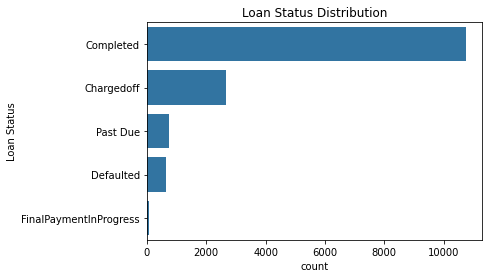

In [56]:
#visualize loan status variable 
#choose color of bars
base_color = sb.color_palette()[0]

#create order for values from highest to least count
group_order = loans_clean.LoanStatus.value_counts().index

#plot
sb.countplot(data = loans_clean, y = "LoanStatus", color = base_color, order = group_order)
plt.ylabel("Loan Status")
plt.title("Loan Status Distribution");


##### Observations
- Most borrowers complete their loans.
- There are more borrowers whose loans are charged off than there are those with their loans past due.
- The number of borrowers who defaulted on their loans is only slightly less than those for whom their loans are past due.
- Borrowers with their final payment in progress are the least.

##### How are the interest rates distributed?

In [57]:
#summary statistics on borrower rate
loans_clean.BorrowerRate.describe()

count    14882.000000
mean         0.201281
std          0.085881
min          0.000000
25%          0.128825
50%          0.194500
75%          0.271200
max          0.360000
Name: BorrowerRate, dtype: float64

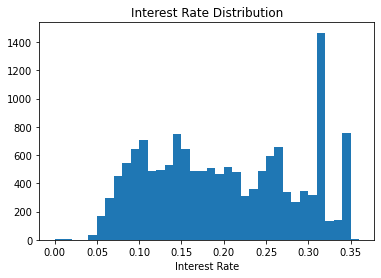

In [58]:
#visualize borrow rate variable 
#create bin edges
bins = np.arange(0, loans_clean.BorrowerRate.max() + 0.01, 0.01)

#plot
plt.hist(data = loans_clean, x = "BorrowerRate", bins = bins)

plt.xlabel("Interest Rate");
#plt.xlim(0.03, 0.37)
plt.title("Interest Rate Distribution"); 



##### Observations 

- It is multi-modal 
- The highest peak is for interest rate between 0.31 and 0.32
- There are outliers between 0.00 and 0.02, also between 0.35 and 0.36 <br> 

In [59]:
#investigate outliers 
#check rows with interest rate betwee  0 and 0.02
low_rates = loans_clean.query('BorrowerRate >= 0.00 & BorrowerRate < 0.02')
low_rates
      

,TermMonths,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,JobStatus,Term
15993,36,Chargedoff,0.01823,0.0100,Debt Consolidation,NY,Retail Management,Full-Time,False,"$1-24,999",2000,Working,Mid Term
37201,36,Completed,0.02998,0.0100,Student Use,CA,Administrative Assistant,Part-Time,False,"$1-24,999",1500,Working,Mid Term
50251,36,Completed,0.01325,0.0001,Debt Consolidation,AR,Professional,Full-Time,False,"$1-24,999",5000,Working,Mid Term
78920,36,Completed,0.01987,0.0000,Debt Consolidation,NJ,Dentist,Full-Time,True,"$75,000-99,999",25000,Working,Mid Term
105191,36,Chargedoff,0.02998,0.0100,Personal Loan,NY,Other,Self-Employed,False,"$1-24,999",1500,Working,Mid Term
112717,36,Completed,0.01315,0.0000,Other,CA,Analyst,Full-Time,False,"$100,000+",3000,Working,Mid Term


In [60]:
#obtain summary statistics for rows with interest rate between 0.35 and 0.36
high_rates = loans_clean.query('BorrowerRate >= 0.35 & BorrowerRate < 0.36')
high_rates.LoanOriginalAmount.describe()
                  

count      554.000000
mean      3342.194946
std       3047.936633
min       1000.000000
25%       1500.000000
50%       2525.500000
75%       4000.000000
max      25000.000000
Name: LoanOriginalAmount, dtype: float64

In [61]:
#obtain maximum original loan amount value
loans_clean.LoanOriginalAmount.max() 


35000

__For interest rates between 0 and 0.02__:<br>
There are two loan entries or rows with 0 value interest rates and an original loan amount of \\$25,000 and \\$3,000 respectively.<br>
A third loan entry with an original loan amount of \\$5,000 has an interest rate of 0.0001 which is lower than the interest rate for a loan amount of \\$1,500.<br> 
The two other loan entries with original loan amounts of \\$1,500 and \\$2,000 have relatively low interest rates compared to other loans of the same amount.<br>


__For interest rates between 0.35 and 0.36__:<br> 
Interest rates in this range are relatively high and seeing how no rows with original loan amounts of \\$35,000 have an interest rate in that range, it is possible that the record of interest rates for these rows is erroneous. <br> 


To be safe, these rows will be dropped, and a new plot will be created for the __BorrowerRate__ variable. 

In [62]:
#drop BorrowerRate outlier rows 
loans_clean.drop(low_rates.index, inplace = True) 
loans_clean.drop(high_rates.index, inplace = True) 

#confirm 
#for low interest rates 
loans_clean.query('BorrowerRate >= 0.00 & BorrowerRate < 0.02')


,TermMonths,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,JobStatus,Term


In [63]:
#for high interest rates 
loans_clean.query('BorrowerRate >= 0.35 & BorrowerRate < 0.36')


,TermMonths,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,JobStatus,Term


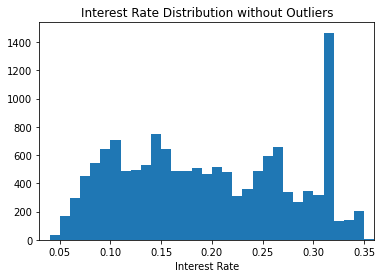

In [64]:
#revisualize borrow rate variable 
#create bin edges
bins = np.arange(0, loans_clean.BorrowerRate.max() + 0.01, 0.01)

#plot
plt.hist(data = loans_clean, x = "BorrowerRate", bins = bins)
plt.xlabel("Interest Rate");
plt.xlim(0.03, 0.36)
plt.title("Interest Rate Distribution without Outliers"); 


##### How is loan amount distributed?

In [65]:
#obtain summary statistics for LoanOriginalAmount variable
loans_clean.LoanOriginalAmount.describe()

count    14322.000000
mean      7540.879067
std       5885.548949
min       1000.000000
25%       3200.000000
50%       5000.000000
75%      10000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

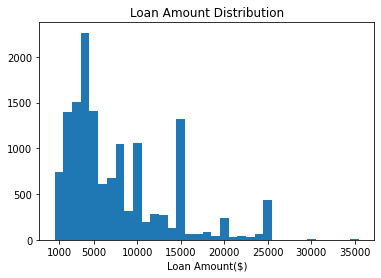

In [66]:
#create bin edges
bins = np.arange(500, 35500 + 1000, 1000) 

#plot
plt.hist(data = loans_clean, x = "LoanOriginalAmount", bins = bins)

#create tick labels
ticks = [1000, 5000, 10000, 15000, 20000, 25000, 30000, 35000] 
tick_labels = ["{}".format(tick) for tick in ticks]

plt.xticks(ticks, tick_labels)
#plt.xlim(0, 25500)
plt.xlabel("Loan Amount($)")
plt.title("Loan Amount Distribution");



##### Observations 

- The data distribution is multimodal
- There are outliers having values of 30,000 and 35,000 <br> 

In [67]:
#investigate outliers 
loans_clean.query('LoanOriginalAmount > 27000 and LoanOriginalAmount < 36000')


,TermMonths,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,JobStatus,Term
2636,36,Past Due,0.17754,0.1414,Debt Consolidation,FL,Computer Programmer,Employed,False,"$100,000+",35000,Working,Mid Term
10825,36,Completed,0.13138,0.1034,Business,CA,Computer Programmer,Employed,True,"$100,000+",34000,Working,Mid Term
15459,36,Completed,0.20053,0.1639,Debt Consolidation,OR,Other,Employed,True,"$100,000+",35000,Working,Mid Term
41694,60,Completed,0.14760,0.1249,Debt Consolidation,PA,Pharmacist,Employed,True,"$100,000+",35000,Working,Long Term
44659,60,Completed,0.16294,0.1399,Debt Consolidation,WI,Professional,Employed,True,"$100,000+",35000,Working,Long Term
46741,36,Completed,0.15833,0.1299,Debt Consolidation,CA,Professional,Employed,True,"$100,000+",30000,Working,Mid Term
49022,36,Completed,0.20462,0.1679,Motorcycle,CT,Accountant/CPA,Employed,True,"$100,000+",35000,Working,Mid Term
50066,60,Completed,0.16294,0.1399,Debt Consolidation,NY,Analyst,Employed,True,"$100,000+",34000,Working,Long Term
51770,36,Past Due,0.17601,0.1399,Vacation,CA,Construction,Employed,True,"$100,000+",35000,Working,Mid Term
56440,36,Completed,0.19645,0.1599,Debt Consolidation,CA,Professional,Employed,True,"$100,000+",28000,Working,Mid Term


These outliers are quite valid, and so will not be dropped.

##### What income range do most borrowers belong in?

In [68]:
#obtain number of count for each income range 
range1 = loans_clean.query('IncomeRange == "$0"').IncomeRange.count()
range2 = loans_clean.query('IncomeRange == "$1-24,999"').IncomeRange.count() 
range3 = loans_clean.query('IncomeRange == "$25,000-49,999"').IncomeRange.count() 
range4 = loans_clean.query('IncomeRange == "$50,000-74,999"').IncomeRange.count() 
range5 = loans_clean.query('IncomeRange == "$75,000-99,999"').IncomeRange.count() 
range6 = loans_clean.query('IncomeRange == "$100,000+"').IncomeRange.count() 



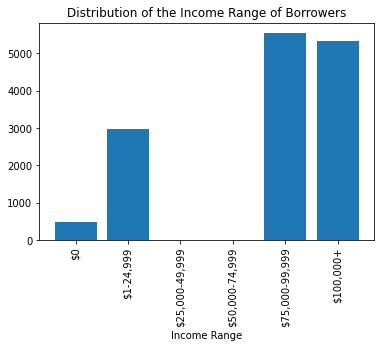

In [69]:
#visualize the income range variable
x_num = np.arange(6) 
y_values = [range1, range2, range3, range4, range5, range6] 
x_labels = ["$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"] 


#plot 
plt.bar(x_num, y_values, tick_label = x_labels)
plt.xticks(rotation = 90)
plt.xlabel("Income Range")
plt.title("Distribution of the Income Range of Borrowers") ;


##### Observations 
- Most of the borrowers have an income range of \\$75,000-99,999. This is closely followed by borrowers in the \\$100,000+ income range.
- Borrowers in the \\$0 income range are the least. 
- There are more borrowers in the \\$1-24,999 income range than there are in \\$0 income range, but they are less than those in \\$100,000+ income range.
-Lastly, there are no borrowers in the \\$25,000-49,999 and \\$50,000-74,999 income range.<br>


##### Are there more borrowers with job than there are those without?

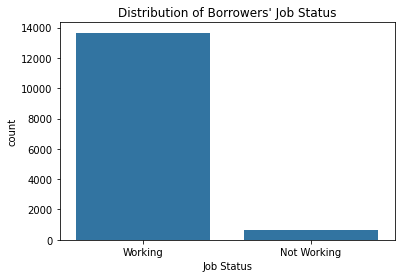

In [70]:
#visualize the job status variable 
sb.countplot(data = loans_clean, x = "JobStatus", color = base_color)

plt.xlabel("Job Status")
plt.title("Distribution of Borrowers' Job Status"); 


##### Observations 
- There are only a few borrowers without a job.
- There is a large difference in number between borrowers with job and borrowers without jobs.<br>

Below, the __EmploymentStatus__ variable will be visualized to further explain the reason for the large difference between borrowers that are working and those not working.<br>

##### What employment status has the highest frequency?

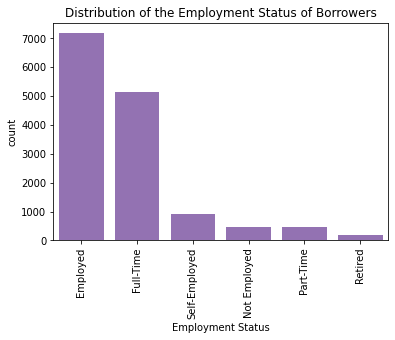

In [71]:
#visualize employment status 
#choose color of bars
color5 = sb.color_palette()[4]

#create order from highest to least
group_order = loans_clean.EmploymentStatus.value_counts().index

#plot
sb.countplot(data = loans_clean, x = "EmploymentStatus", color = color5, order = group_order)
plt.xticks(rotation = 90)
plt.xlabel("Employment Status")
plt.title("Distribution of the Employment Status of Borrowers");


##### Observations 
- The highest employment status count belongs to borrowers with "Employed" status, followed by those with "Full-Time" status. 
- The count of borrowers with "Self-Employed", "Not-Employed", "Part-Time", and "Retired" statuses are relatively less than the count of borrowers with "Employed" and "Full-Time" employment statuses.
- There are more self-employed borrowers than not employed and part-time borrowers.
- The "Not Employed" bar looks almost equal / slightly less than the "Part-Time" status bar.
- Retired borrowers are the least. <br>

This explains the large difference between the number of borrowers with jobs and those without.<br> 


##### What listing category has the highest proportion?

In [72]:
#assign value counts of ListingCategory column to a variable
col_count = loans_clean.ListingCategory.value_counts()

#obtain total sum of values in ListingCategory column  
total_sum = col_count.sum() 


In [73]:
#create group order from highest count of values to least 
group_order = loans_clean.ListingCategory.value_counts().index

#create tick marks and labels for x-axis
ticks = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
x_labels = ['{}'.format(tick) for tick in ticks]


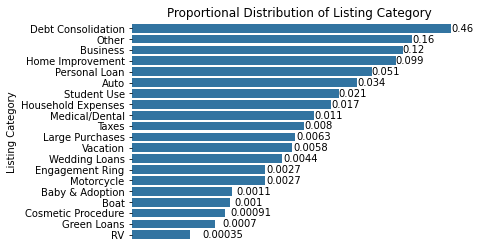

In [74]:
#visualize proportion of each listing category 
#plot a horizontal bar chart
ax = sb.countplot(data = loans_clean, y = "ListingCategory", color = base_color, order = group_order)

#rescale the x-axis in logarithm
plt.xscale("log")

plt.xticks(ticks, x_labels)
plt.xticks(rotation = 90)
plt.ylabel("Listing Category");

#turn off top, bottom, right, and left spine 
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False) 
ax.spines["left"].set_visible(False)

#turn off x-axis 
ax.get_xaxis().set_visible(False)

#include the proportion of each listing category as text om their appropriate bars 
for i in range(col_count.shape[0]): 
    count = col_count[i] 
    count_str = "{:0.2}".format(count / total_sum) 
    plt.text(count + 2, i, count_str, va = "center") 
    
plt.title("Proportional Distribution of Listing Category");
    

##### Observations 
- Almost half the listings are for debt consolidation.
- Only approximately 2% of listings are for student use.<br> 


##### Are there more loans with longer loan lengths?

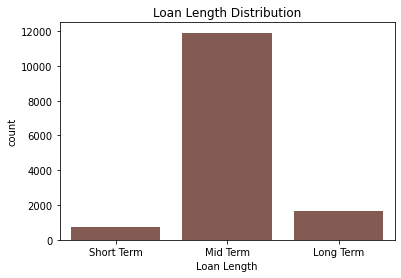

In [75]:
#visualize Term variable 
#choose color of bars 
color6 = sb.color_palette()[5]

#plot
sb.countplot(data = loans_clean, x = "Term", color = color6)

plt.xlabel("Loan Length")
plt.title("Loan Length Distribution");
             

##### Observations 

- There are by far more mid term loans than there are long term and short term loans.
- Short term loans are the fewest 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?<br> 

The loan status was unevenly distributed across completed, charged off, past due, defaulted, and final payment in progress. The majority of the loans were completed, and this was followed by loans charged off. Loans with final payment in progress had the least number of counts or frequency, and there was only a small difference between the number of loans past due and the number of defaulted loans.<br>  

There were more borrowers with an income range of \\$75,000-99,999, and this was closely followed by borrowers with an income range of \\$100,000+. Fewer borrowers were in the \\$0 income range, and the borrowers in the \\$1-24,999 income range were greater than those in the \\$0 range by a wide margin but less than those in the \\$100,00+ range.<br> 

The frequency of borrowers working in the job status variable was by far more than those not working.<br> 

Almost half the values in the listing category were "Debt Consolidation", with the least being "RV" with only a percentage proportion of 0.035%. Also, only approximately 2% of the listings were for "Student Use".<br> 
The scale of the x-axis (axis representing count/frequency) was transformed to a log scale because of the large values its large range of values.<br>

Compared to mid term loans, there were only a few long and short term loans, as more than half the loans were mid term. Short term loans were the least in number.<br>



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?<br>

In the interest rate variable (__BorrowerRate__), there were some outliers on both extremes (high and low). The interest rate values were considered either too high or too low when compared with the trend of interest rate for their loan amount, and the rows were dropped to be safe.<br> 

Outliers were also present in the loan amount variable (__LoanOriginalAmount__), but these rows were not dropped as they were considered valid.



<a id="bivariate"><\a>

## Bivariate Exploration

In this section, relationships between pairs of variables in the dataset will be investigated. 

##### Does loan length affect loan status?

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


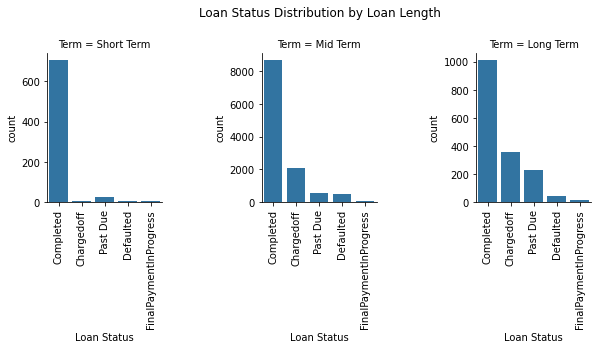

In [76]:
#visualize
g = sb.FacetGrid(data = loans_clean, col = "Term", sharey = False)
g.map(sb.countplot, "LoanStatus");

for ax in g.axes.flat: 
    label = ax.get_xticklabels()
    ax.set_xticklabels(label, rotation = 90)
    ax.set_xlabel("Loan Status");

#set title of figure
plt.suptitle("Loan Status Distribution by Loan Length", y = 1.1);
 


##### Observations

__Short Term__<br>
- Most loans are completed.
- Only a very few loans are charged off or defaulted or have their final payment in progress.
- The amount of loans past due are more that those charged off, defaulted, or that have their final payment in progress, but is by far less than completed loans.<br>

__Mid Term__<br>
- The majority of the loans are completed, and only a very few have their final payment in progress. 
- An amount of the loans far less than that of loans that are completed, but greater than those of loans that are past due, defaulted, and have their final payment in progress are charged off.
- Loans that are past due are present in the same amount as defaulted loans.<br> 

__Long Term__<br>
- More loans are completed than charged off or past due or defaulted. 
- Less than half the loans are charged off.
- There is a slight decrease from the number of loans charged off to the number of loans past due.
- Only a very few loans are defaulted, and fewer have their final payment in progress.

##### What is the effect of loan amount on loan status?

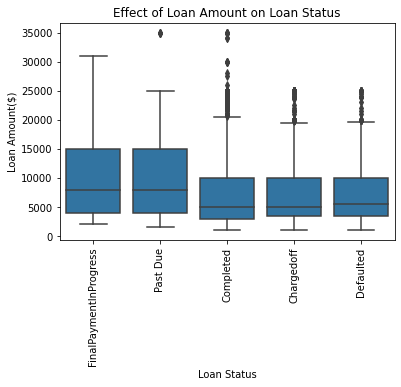

In [77]:
sb.boxplot(data = loans_clean, x = "LoanStatus", y = "LoanOriginalAmount", 
              color = base_color, order = ["FinalPaymentInProgress", "Past Due", 
                                           "Completed", "Chargedoff", "Defaulted"])

plt.xticks(rotation = 90)
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount($)")
plt.title("Effect of Loan Amount on Loan Status"); 


##### Observations 

- Generally, as the loan amount decreases, it goes from final payment in progress to past due to completed and then to defaulted and chargedoff.
- There are high outlier loan amounts with past due and completed statuses.

##### What percentage of loans taken for student use gets completed?

In [78]:
#select out rows with listing category as Student Use
student_use = loans_clean.query('ListingCategory == "Student Use"')

#get the count for each loan status
loan_stats_count = student_use.LoanStatus.value_counts() 

#get the total number of loan status values 
total_student_stats = loan_stats_count.sum()

#obtain status order for the student use data 
stat_order = loan_stats_count.index


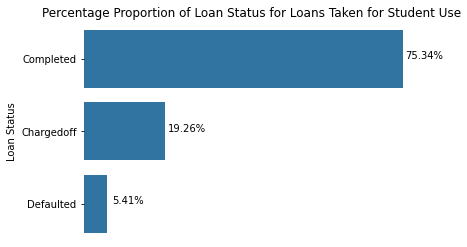

In [79]:
#visualize 
g = sb.countplot(data = student_use, y = "LoanStatus", color = base_color, 
            order = stat_order)

#input percentage of each status as texts on their respective bars
for i in range(loan_stats_count.shape[0]):
    count = loan_stats_count[i]
    pct_text = "{:0.2f}%".format(100 * (count/total_student_stats))
    plt.text(count + 15, i , pct_text, ha = "center");  
    
#remove spines 
g.spines["top"].set_visible(False)
g.spines["right"].set_visible(False)
g.spines["left"].set_visible(False)
g.spines["bottom"].set_visible(False)

#remove y-axis 
g.get_xaxis().set_visible(False)

plt.ylabel("Loan Status")
plt.title("Percentage Proportion of Loan Status for Loans Taken for Student Use");


##### Observations<br> 

- More than half the loans are completed 
- A few percent of the loans were charged off and defaulted, with charged-off loans being more than defaulted loans.

##### How does the length of a loan affect interest rate?

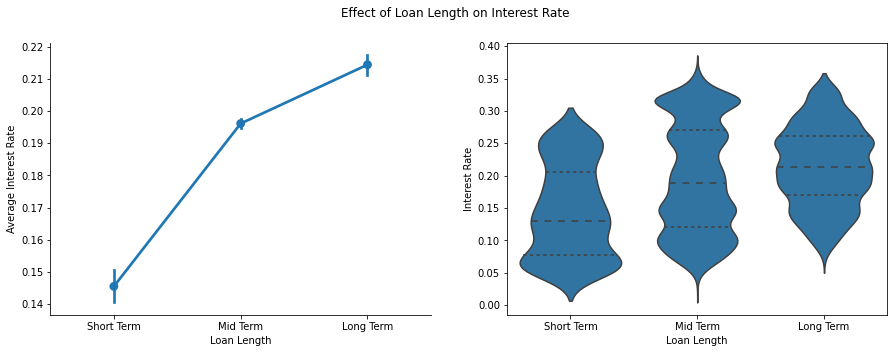

In [80]:
#set fig size 
plt.figure(figsize = (15, 5))

#subplot for point plot 
plt.subplot(1, 2, 1)
g = sb.pointplot(data = loans_clean, x = "Term", y = "BorrowerRate",
             color = base_color);
#remove top and right spines
g.spines["top"].set_visible(False)
g.spines["right"].set_visible(False)
plt.xlabel("Loan Length") 
plt.ylabel("Average Interest Rate")



#subplot for violin plot
plt.subplot(1, 2, 2) 
sb.violinplot(data = loans_clean, x = "Term", y = "BorrowerRate", 
              color = base_color, inner = "quartile"); 
plt.xlabel("Loan Length") 
plt.ylabel("Interest Rate")

#set title of figure
plt.suptitle("Effect of Loan Length on Interest Rate");


##### Observations 
- There is a positive relationship between both variables.
- The distributions are multimodal. 
- Generally, there is an increase in interest rate from short term to long term.
- Most of the interest rate values for long term loans are between 0.15 and 0.27.

##### Are higher loan amount usually associated with long loan length?

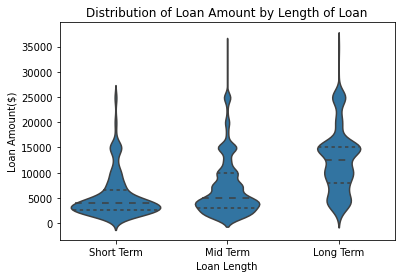

In [81]:
#visualize
sb.violinplot(data = loans_clean, x = "Term", y = "LoanOriginalAmount", 
              color = base_color, inner = "quartile");


plt.xlabel("Loan Length") 
plt.ylabel("Loan Amount($)")
plt.title("Distribution of Loan Amount by Length of Loan");



##### Observations 

- The relationship is positive. There is an increase in loan amount as loan length increases.
- The distributions are multimodal. 
- Most short term loans are less than \\$5,000.
- Long term loans has its highest distribution of loan amount at about \\$15,000.

##### Does loan amount increase with increasing income range?

In [82]:
#obtain the average loan amount for each income range values 
range1_mean = loans_clean[loans_clean["IncomeRange"] == "$0"].LoanOriginalAmount.mean() 
range2_mean = loans_clean[loans_clean["IncomeRange"] == "$1-24,999"].LoanOriginalAmount.mean() 
range3_mean = loans_clean[loans_clean["IncomeRange"] == "$25,000-49,999"].LoanOriginalAmount.mean() 
range4_mean = loans_clean[loans_clean["IncomeRange"] == "$50,000-74,999"].LoanOriginalAmount.mean() 
range5_mean = loans_clean[loans_clean["IncomeRange"] == "$75,000-99,999"].LoanOriginalAmount.mean() 
range6_mean = loans_clean[loans_clean["IncomeRange"] == "$100,000+"].LoanOriginalAmount.mean() 



In [83]:
#set parameters for bar plot
x_num = np.arange(6) 
y_values = [range1_mean, range2_mean, range3_mean, range4_mean, range5_mean,
            range6_mean]
labels = ["$0", "$1-24,999", "$25,000-49,999", 
          "$50,000-74,999", "$75,000-99,999",
          "$100,000+"]

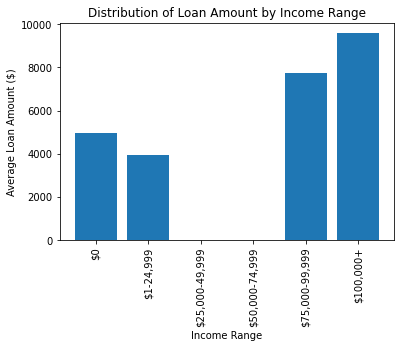

In [84]:
#plot bar plot 
plt.bar(x_num, y_values, tick_label = labels)
plt.xticks(rotation = 90)
plt.xlabel("Income Range")
plt.ylabel("Average Loan Amount ($)");
plt.title("Distribution of Loan Amount by Income Range"); 


###### Observations 

- The average loan amount of the \\$1-24,999 income range is slightly less than that of the \\$0 income range.
- Generally, there is an increase in loan amount from the \\$0 income range to \\$100,000+.


##### Are borrowers who take loans for debt consolidation mostly high-income earners? <br>

From the univariate exploration of this dataset, it has been established that there are no borrowers in the \\$25,000-49,999 and \\$50,000-74,999 income range. Hence the low-income range in this analysis will only consist of the \\$0 and \\$1-24,999 income ranges, and the high-income ranges are \\$75,000-99,999 and \\$100,000+.

In [85]:
#filter out debt consolidation rows 
debt_cons = loans_clean[loans_clean["ListingCategory"] == "Debt Consolidation"] 

#select out the count of each income range 
cons_inc1 = debt_cons[debt_cons["IncomeRange"] == "$0"].IncomeRange.count()
cons_inc2 = debt_cons[debt_cons["IncomeRange"] == "$1-24,999"].IncomeRange.count()
cons_inc3 = debt_cons[debt_cons["IncomeRange"] == "$25,000-49,999"].IncomeRange.count() 
cons_inc4 = debt_cons[debt_cons["IncomeRange"] == "$50,000-74,999"].IncomeRange.count() 
cons_inc5 = debt_cons[debt_cons["IncomeRange"] == "$75,000-99,999"].IncomeRange.count()
cons_inc6 = debt_cons[debt_cons["IncomeRange"] == "$100,000+"].IncomeRange.count()



In [86]:
#get total value for low income earners 
#sum of count for income range $0 - $74,999
total_low_inc = cons_inc1 + cons_inc2


#get total value for higher income earners 
#sum of count for income range $75,000-99,999
#and $100,0000+ 
total_high_inc = cons_inc5 + cons_inc6


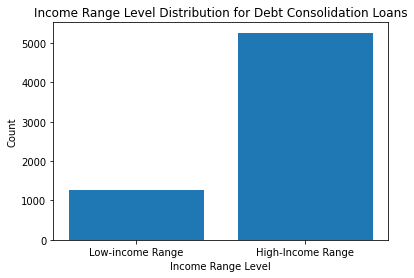

In [87]:
#set bar chart parameters 
x_num = np.arange(2)
y_values = [total_low_inc, total_high_inc]
labels = ["Low-income Range", "High-Income Range"]

#plot 
plt.bar(x_num, y_values, tick_label = labels)
plt.xlabel("Income Range Level")
plt.ylabel("Count")
plt.title("Income Range Level Distribution for Debt Consolidation Loans");


##### Observations 

- There is a higher number of high-income earners.

##### Does interest rate increase with an increase in loan amount?

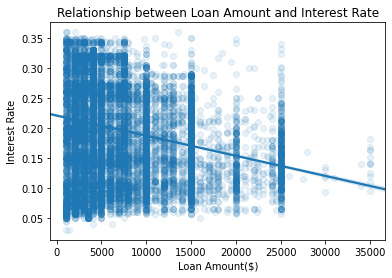

In [88]:
#visualize
sb.regplot(data = loans_clean, x = "LoanOriginalAmount", y = "BorrowerRate", 
           truncate = False, scatter_kws = {"alpha" : 1/10});

plt.xlabel("Loan Amount($)") 
plt.ylabel("Interest Rate")
plt.title("Relationship between Loan Amount and Interest Rate");



##### Observations

- The relationship is negative. 

- There is a decrease in interest rate as loan amount increases.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

One interesting relationship was seen between loan length and interest rate. The bivariate visualization of both variables showed a positive relationship,  as the interest rate increased with increasing loan length, from short to long term.<br> 

A positive relationship was also noticed between loan amount and loan length. As loan amount increased, there was also an increase in loan length with progression from short to mid, and then to long term.<br>

Another relationship noticed was that between income range, and loans listed in the debt consolidation category. From the visualization created, there were by far more high-income earners who took loans for debt consolidation than there were low-income earners.<br> 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

An interesting relationship was noticed between loan amount and interest rate. The visualization of the relationship showed a decrease in interest rate as loan amount increased.

<a id="multivariate"><\a>

## Multivariate Exploration 

Here, the relationship between interest rates, loan amount and loan length, as well as that between loan amount/interest rate, loan status and loan length will be visualized.


During the bivariate exploration of the dataset, separate visualizations were created between different pairs of these variables, but a single visualization combining some of the different pairs will help us gain a better understanding of the data.

##### What is the relationship between interest rates, loan amount and loan length? 

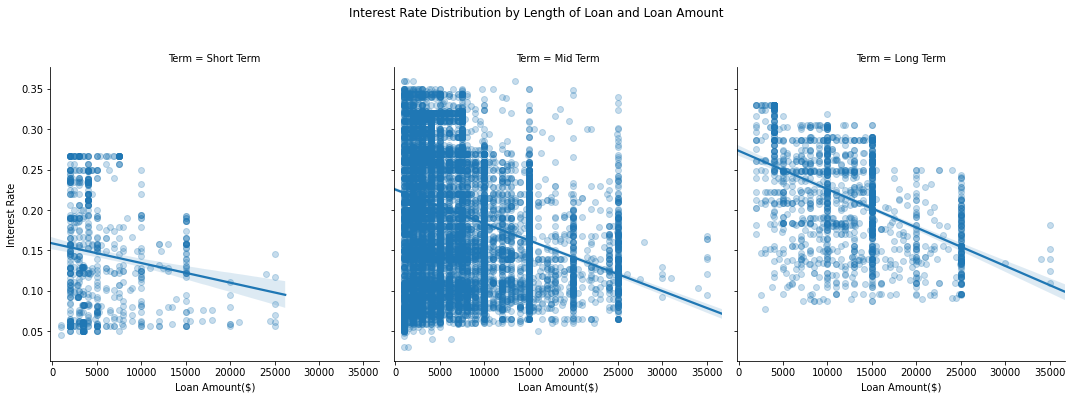

In [89]:
#visualize
g = sb.FacetGrid(data = loans_clean, col = "Term", 
                 height = 5) 
g.map(sb.regplot, "LoanOriginalAmount", "BorrowerRate", 
      truncate = False, scatter_kws = {"alpha" : 1/4});

#set x-axis label for each plot in the facet grid 
for ax in g.axes.flat: 
    ax.set_xlabel("Loan Amount($)")
    ax.set_ylabel("Interest Rate")

#set y-axis label and title of figure
plt.suptitle("Interest Rate Distribution by Length of Loan and Loan Amount", y = 1.1);


##### Observations 

- Generally, there is an increase in loan amount as loan length increases.
- As the loan amount increases, the interest rate decreases. 
- Also, there is a general increase in interest rate from short to long term (loan length).

##### What trend does loan status follow with increasing loan amount and loan length?

In [90]:
#create order by which the hue is created
order_hue = ["Defaulted", "Chargedoff", "Completed", 
             "Past Due", "FinalPaymentInProgress"]



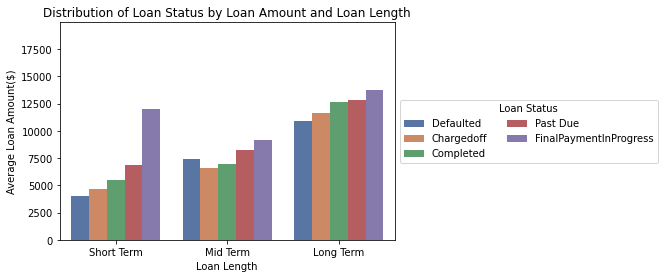

In [91]:
#visualize
sb.barplot(data = loans_clean, x = "Term", y = "LoanOriginalAmount", 
           hue = "LoanStatus", hue_order = order_hue, palette = "deep", 
           errwidth = 0);

plt.legend(title = "Loan Status", ncol = 2, loc = 6, bbox_to_anchor = (1.0, 0.5));
plt.xlabel("Loan Length") 
plt.ylabel("Average Loan Amount($)")
plt.title("Distribution of Loan Status by Loan Amount and Loan Length");


##### Observations 

- Generally, as loan amount increases, there is an increase in loan length.
- Each term has loan statuses distributed across "Defaulted", "Chargedoff", "Completed", "Past Due", and "FinalPaymentInProgress".
- Generally, as loan amount increases, loan status goes from defaulted to charged off to completed to past due and to final payment in progress in each loan length.
- There is an exception with mid term loans where increasing loan amount causes loan status to go from charged off to completed to defaulted to past due, and finally to final payment in progress.

##### What trend does loan status follow with increasing interest rate and loan length?

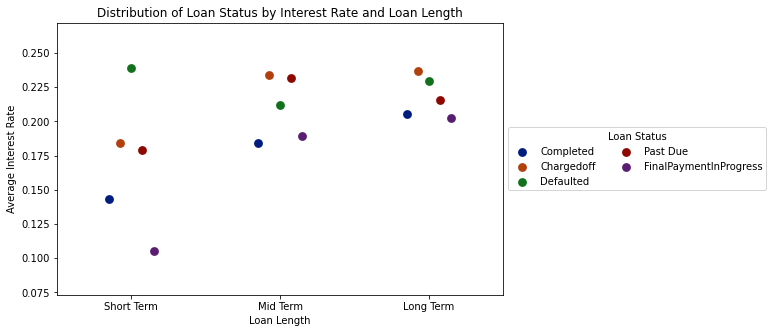

In [92]:
#set figure 
plt.figure(figsize = (8,5))

#visualise
sb.pointplot(data = loans_clean, x = "Term", y = "BorrowerRate", 
           hue = "LoanStatus", palette = "dark", 
             dodge = 0.3, linestyles = "", errwidth = 0);

#set legend
plt.legend(title = "Loan Status", ncol = 2, loc = 6, bbox_to_anchor = (1.0, 0.5)); 

plt.xlabel("Loan Length") 
plt.ylabel("Average Interest Rate") 
plt.title("Distribution of Loan Status by Interest Rate and Loan Length");


##### Observations

- Generally, there is an increase in interest rates from short to long term (loan length).
- Loans with high-interest rates are usually past due, defaulted, or charged off.
- Each term has its loan status spread across final payment in progress, completed, past due, defaulted, and charged off.
- For short term loans, as interest rate increases, loan status goes from final payment in progress to completed to past due to charged off to defaulted.
- For mid term loans, as interest rate increases, loan status goes from completed to final payment in progress to defaulted to past due to charged off.
- For long term loans, as interest rate increases, loan status goes from final payment in progress to completed to past due to defaulted to charged off with increasing interest rate.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The distribution of loan status by loan amount followed the same pattern in the short and long term loan lengths, although, for the short term loan length, loans with their final payment in progress had a much higher average loan amount than the loans with other statuses. For the mid term loan length though, defaulted loans had a higher average loan amount than charged off and completed loans.<br>

The visualization of the relationship between loan amount, loan status and loan length allowed for a better understanding of the distribution of the various loan statuses by loan amount, across the different loan lengths. In the same way, the visualization of the relationship between interest rate, loan status and loan length provided a better understanding of the distribution of the various loan statuses by interest rate, across the different loan lengths.<br>

### Were there any interesting or surprising interactions between features?

In the visualization of the relationship between loan amount, interest rate and loan length, it was seen that increasing loan amount is associated with a decrease in interest rate across the three loan lengths.

<a id="conclusions"><\a>

## Conclusions

In the exploration of the modified Loan Data from Prosper dataset, various visualizations were created to find relationships between variables. First relationships were created in pairs, and then multiple pairs were combined for a better understanding of the relationship between some variables. The results of the exploration showed that:<br>

75.34% of loans taken for student use are usually completed. Only 19.26% of the loans are charged off, and only an even smaller percentage, 5.41%, are defaulted. 

Across each loan length, from short to long term, interest rates as well as loan amount, increases, and higher loan amounts usually have a lower interest rate. This could be a result of other factors/variables which were not included in this analysis such as the borrower's credit risk rating, as high-risk borrowers usually get high-interest rates.

Loans are mostly taken for debt consolidation, and these debt consolidation loans are usually taken by borrowers with high incomes (\\$75,000-100,000+). Also, generally, loan amounts increase with an increase in income range. 

Lastly, irrespective of loan length, loans with high-interest rates, are usually either not paid in time, become defaulted or are charged off, and lower loan amounts are likely to become defaulted or charged off. This reiterates the effect of increasing loan amounts on interest rates.